# ML_PROJECT (Ticket sales prediction)

.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import  r2_score

## Importing the dataset

In [3]:
df = pd.read_csv("cinemaTicket_Ref.csv")
df.head() 

,film_code,cinema_code,total_sales,tickets_sold,tickets_out,show_time,occu_perc,ticket_price,ticket_use,capacity,date,month,quarter,day
0,1492,304,3900000,26,0,4,4.26,150000.0,26,610.328638,2018-05-05,5,2,5
1,1492,352,3360000,42,0,5,8.08,80000.0,42,519.801980,2018-05-05,5,2,5
2,1492,489,2560000,32,0,4,20.00,80000.0,32,160.000000,2018-05-05,5,2,5
3,1492,429,1200000,12,0,1,11.01,100000.0,12,108.991826,2018-05-05,5,2,5
4,1492,524,1200000,15,0,3,16.67,80000.0,15,89.982004,2018-05-05,5,2,5


## Shape of the dataset

In [4]:
df.shape

(142524, 14)

## Information of the dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142524 entries, 0 to 142523
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   film_code     142524 non-null  int64  
 1   cinema_code   142524 non-null  int64  
 2   total_sales   142524 non-null  int64  
 3   tickets_sold  142524 non-null  int64  
 4   tickets_out   142524 non-null  int64  
 5   show_time     142524 non-null  int64  
 6   occu_perc     142399 non-null  float64
 7   ticket_price  142524 non-null  float64
 8   ticket_use    142524 non-null  int64  
 9   capacity      142399 non-null  float64
 10  date          142524 non-null  object 
 11  month         142524 non-null  int64  
 12  quarter       142524 non-null  int64  
 13  day           142524 non-null  int64  
dtypes: float64(3), int64(10), object(1)
memory usage: 15.2+ MB


## Filling null values with mean

In [6]:
df.isnull().sum()

film_code         0
cinema_code       0
total_sales       0
tickets_sold      0
tickets_out       0
show_time         0
occu_perc       125
ticket_price      0
ticket_use        0
capacity        125
date              0
month             0
quarter           0
day               0
dtype: int64

In [7]:
df['occu_perc'] = df['occu_perc'].fillna(df['occu_perc'].mean())
df['capacity'] = df['capacity'].fillna(df['capacity'].mean())


In [8]:
df.isnull().sum()

film_code       0
cinema_code     0
total_sales     0
tickets_sold    0
tickets_out     0
show_time       0
occu_perc       0
ticket_price    0
ticket_use      0
capacity        0
date            0
month           0
quarter         0
day             0
dtype: int64

## Statistical description

In [9]:
df.describe()

,film_code,cinema_code,total_sales,tickets_sold,tickets_out,show_time,occu_perc,ticket_price,ticket_use,capacity,month,quarter,day
count,142524.000000,142524.000000,1.425240e+05,142524.000000,142524.000000,142524.000000,142524.000000,142524.000000,142524.000000,142524.000000,142524.000000,142524.000000,142524.000000
mean,1518.985111,320.378427,1.234728e+07,140.137570,0.237413,3.932103,19.965986,81234.599886,139.900157,854.723605,6.776852,2.634721,16.112585
std,36.184450,159.701229,3.065486e+07,279.758733,2.923206,3.056276,22.643509,33236.599278,279.564935,952.700045,2.195843,0.809692,8.949471
min,1471.000000,32.000000,2.000000e+04,1.000000,0.000000,1.000000,0.000000,483.870968,-219.000000,-2.000000,2.000000,1.000000,1.000000
25%,1485.000000,181.000000,1.260000e+06,18.000000,0.000000,2.000000,3.760000,60000.000000,18.000000,277.777778,5.000000,2.000000,8.000000
50%,1498.000000,324.000000,3.720000e+06,50.000000,0.000000,3.000000,10.370000,79454.235185,50.000000,526.028883,7.000000,3.000000,16.000000
75%,1556.000000,474.000000,1.110000e+07,143.000000,0.000000,5.000000,28.190000,100000.000000,143.000000,1037.746584,9.000000,3.000000,24.000000
max,1589.000000,637.000000,1.262820e+09,8499.000000,311.000000,60.000000,147.500000,700000.000000,8499.000000,9692.097160,11.000000,4.000000,31.000000


<AxesSubplot:>

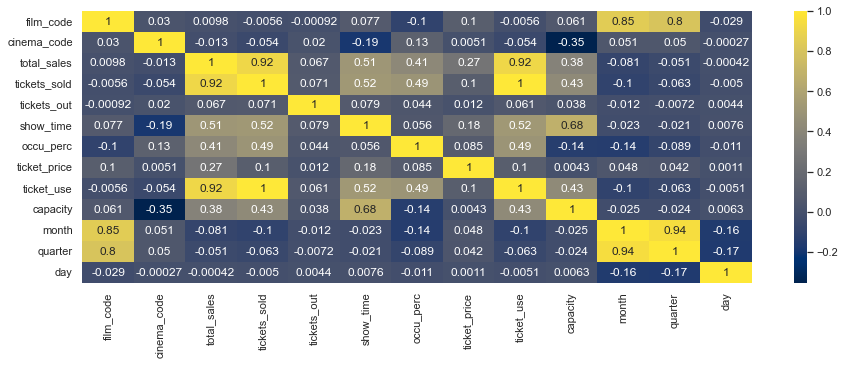

In [10]:
sns.set_theme(color_codes=True)
sns.set_theme(style="darkgrid")
plt.figure(figsize = (15,5))
sns.heatmap(df.corr()  ,annot = True , cmap="cividis")

## Dividing Target variable and Independent variables

In [11]:
X = df[['film_code', 'cinema_code', 'tickets_sold', 'tickets_out', 'show_time', 'occu_perc', 'ticket_price', 'ticket_use', 'capacity', 'month', 'quarter', 'day']]
y = df['total_sales']


## Spliting the data into training and testing

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Normalization of the Data

In [13]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


## Applying Knn model 

In [14]:
model = KNeighborsRegressor(n_neighbors=5)
model.fit(X_train_scaled, y_train)


KNeighborsRegressor()

In [15]:
y_pred = model.predict(X_test_scaled)


## Calculating R-squared Score to know whether model fit data or not

In [16]:
r2 = r2_score(y_test, y_pred)
print("R-squared Score:", r2)


R-squared Score: 0.9736477916725094


#### Knn is good fit because


Here R-squared Score: 0.9736477916725094 ... i.e KNN model has a very good fit to the data. 

R-squared is a statistical measure that represents the proportion of the variance in the target variable that is predictable from the independent variables.

In this case, a score of 0.9736 suggests that approximately 97.36% of the variance in the total sales can be explained by the independent variables used in the model. 

This is a high R-squared score and generally indicates a good fit. 

## Taking a new sample 

In [17]:
new_sample=[[1492,524,15,0,3,16.67,80000,15,89.982004,5,2,5]]
pre=model.predict(new_sample)
pre


array([2840000.])

## Gradio Interfacing to above model

In [18]:
import gradio as gr
# Define the prediction function
def predict_total_sales(film_code, cinema_code, tickets_sold,tickets_out, show_time, occu_perc, ticket_price, ticket_use, capacity,month,quarter,day):
    # Prepare the input data for prediction
    input_data = [[film_code, cinema_code, tickets_sold,tickets_out, show_time, occu_perc, ticket_price, ticket_use, capacity,month,quarter,day]]
    
    # Make the prediction
    prediction =model.predict(input_data)
    
    return prediction[0]

# Create the Gradio interface
inputs = [
    gr.inputs.Number(label="Film Code"),
    gr.inputs.Number(label="Cinema Code"),
    gr.inputs.Number(label="Tickets Sold"),
    gr.inputs.Number(label="Tickets Out"),
    gr.inputs.Number(label="Show Time"),
    gr.inputs.Number(label="Occupancy Percentage"),
    gr.inputs.Number(label="Ticket Price"),
    gr.inputs.Number(label="Ticket Use"),
    gr.inputs.Number(label="Capacity"),
    gr.inputs.Dropdown(choices=list(range(1, 13)),label="Month"),
    gr.inputs.Dropdown(choices=list(range(1, 5)),label="Quarter"),
    gr.inputs.Dropdown(choices=list(range(1, 32)),label="Day")
]

output = gr.outputs.Textbox(label="Predicted Total Sales")

interface = gr.Interface(
    fn=predict_total_sales,
    inputs=inputs,
    outputs=output,
    title="Cinema Ticket Sales Prediction",
    description="Enter the relevant information to predict the total sales.",
    theme="default"
)

# Launch the interface
interface.launch()

C:\Users\Ajay kaligatla\anaconda3\lib\site-packages\gradio\inputs.py:59: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
C:\Users\Ajay kaligatla\anaconda3\lib\site-packages\gradio\inputs.py:62: UserWarning: `optional` parameter is deprecated, and it has no effect
  super().__init__(value=default, label=label, optional=optional)
C:\Users\Ajay kaligatla\anaconda3\lib\site-packages\gradio\inputs.py:219: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
C:\Users\Ajay kaligatla\anaconda3\lib\site-packages\gradio\inputs.py:222: UserWarning: `optional` parameter is deprecated, and it has no effect
  super().__init__(
C:\Users\Ajay kaligatla\anaconda3\lib\site-packages\gradio\outputs.py:22: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the

Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.
